###  Cross-validation 

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,random_state = 7)

In [2]:
from sklearn.neighbors import KNeighborsClassifier

kn_3 = KNeighborsClassifier(n_neighbors = 3)
kn_5 = KNeighborsClassifier(n_neighbors = 5)

In [3]:
from sklearn.model_selection import cross_val_score
kn_3_scores = cross_val_score(kn_3, X_train, y_train, cv=4)
kn_5_scores = cross_val_score(kn_5, X_train, y_train, cv=4)
kn_3_scores

array([ 0.9       ,  0.92857143,  0.92592593,  1.        ])

In [4]:
kn_5_scores

array([ 0.96666667,  0.96428571,  0.88888889,  1.        ])

In [5]:
print("Mean of kn_3: ",kn_3_scores.mean())
print("Mean of kn_5: ",kn_5_scores.mean())

Mean of kn_3:  0.938624338624
Mean of kn_5:  0.95496031746


In [6]:
print("Std of kn_3: ",kn_3_scores.std())
print("Std of kn_5: ",kn_5_scores.std())

Std of kn_3:  0.037152126551
Std of kn_5:  0.0406755710299


In [7]:
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8],[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 1, 2, 1, 2, 1, 2])

from sklearn.model_selection import KFold
kf= KFold(n_splits = 4)

In [8]:
cc = 1
for train_index, test_index in kf.split(X):
    print("Round : ",cc,": ",)
    print("Training indices :", train_index,)
    print("Testing indices :", test_index)
    cc += 1

Round :  1 : 
Training indices : [2 3 4 5 6 7]
Testing indices : [0 1]
Round :  2 : 
Training indices : [0 1 4 5 6 7]
Testing indices : [2 3]
Round :  3 : 
Training indices : [0 1 2 3 6 7]
Testing indices : [4 5]
Round :  4 : 
Training indices : [0 1 2 3 4 5]
Testing indices : [6 7]


In [9]:
kf.get_n_splits()

4

In [10]:
indices_list = list(kf.split(X))

In [11]:
indices_list[3]

(array([0, 1, 2, 3, 4, 5]), array([6, 7]))

In [12]:
train_indices, test_indices = indices_list[3]
X[train_indices]

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [1, 2],
       [3, 4]])

In [13]:
y[train_indices]

array([1, 2, 1, 2, 1, 2])

In [14]:
X[test_indices]

array([[5, 6],
       [7, 8]])

In [15]:
y[test_indices]

array([1, 2])

In [16]:
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8],[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 1, 1, 1, 2, 2, 2, 2])

In [17]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 4)

cc = 1
for train_index, test_index in skf.split(X,y):
    print("Round",cc,":",)
    print("Training indices :", train_index,)
    print("Testing indices :", test_index)
    cc += 1

Round 1 :
Training indices : [1 2 3 5 6 7]
Testing indices : [0 4]
Round 2 :
Training indices : [0 2 3 4 6 7]
Testing indices : [1 5]
Round 3 :
Training indices : [0 1 3 4 5 7]
Testing indices : [2 6]
Round 4 :
Training indices : [0 1 2 4 5 6]
Testing indices : [3 7]


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 5,test_size=0.25)
cc = 1
for train_index, test_index in sss.split(X,y):
    print("Round",cc,":",)
    print("Training indices :", train_index,)
    print("Testing indices :", test_index)
    cc += 1

Round 1 :
Training indices : [1 5 2 0 6 4]
Testing indices : [7 3]
Round 2 :
Training indices : [2 6 7 0 4 1]
Testing indices : [3 5]
Round 3 :
Training indices : [4 1 3 2 5 7]
Testing indices : [0 6]
Round 4 :
Training indices : [0 6 2 4 7 1]
Testing indices : [3 5]
Round 5 :
Training indices : [7 4 0 5 3 1]
Testing indices : [2 6]


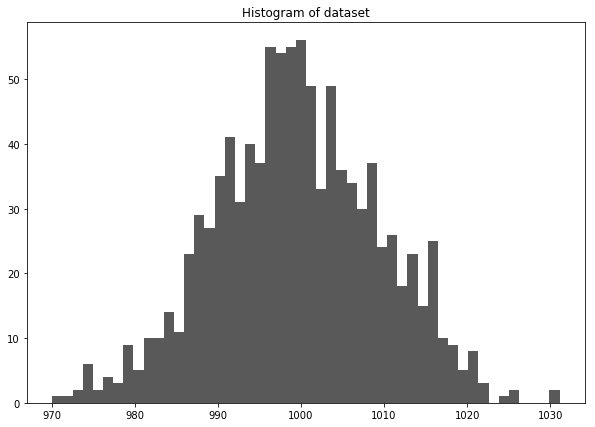

In [19]:
%matplotlib inline

import numpy as np
true_mean = 1000
true_std = 10
N = 1000
dataset = np.random.normal(loc= true_mean, scale = true_std, size=N)
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 7))
ax.hist(dataset, color='k', alpha=.65, histtype='stepfilled',bins=50)
ax.set_title("Histogram of dataset")

In [22]:
holdout_set = dataset[:500]
fitting_set = dataset[500:]
estimate = fitting_set[int():int(N/2)].mean()
estimate

999.25435521709335

In [23]:
data_mean = dataset.mean()
data_mean

999.47804994196224

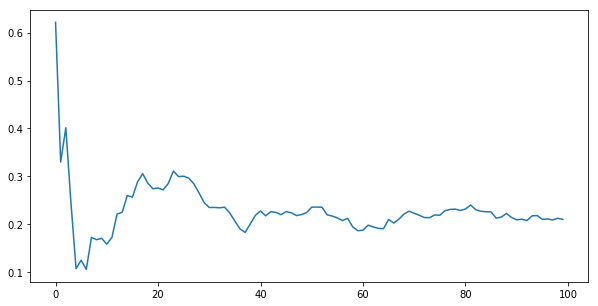

In [24]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=100, test_size=.5, random_state=0)
mean_p = []
estimate_closeness = []
for train_index, not_used_index in shuffle_split.split(fitting_set):
    mean_p.append(fitting_set[train_index].mean())
    shuf_estimate = np.mean(mean_p)
    estimate_closeness.append(np.abs(shuf_estimate - dataset.mean()))

plt.figure(figsize=(10,5))
plt.plot(estimate_closeness)

In [25]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 1, 2, 3, 4])

tscv = TimeSeriesSplit(n_splits=7)

In [26]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Training indices:", train_index, "Testing indices:", test_index)

Training indices: [0] Testing indices: [1]
Training indices: [0 1] Testing indices: [2]
Training indices: [0 1 2] Testing indices: [3]
Training indices: [0 1 2 3] Testing indices: [4]
Training indices: [0 1 2 3 4] Testing indices: [5]
Training indices: [0 1 2 3 4 5] Testing indices: [6]
Training indices: [0 1 2 3 4 5 6] Testing indices: [7]


In [27]:
tscv_list = list(tscv.split(X))

### Search with Scikit-learn

In [29]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,random_state = 7)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [31]:
param_grid = {'n_neighbors': list(range(3,9,1))}

In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score
gs = GridSearchCV(knn_clf,param_grid,cv=10)

In [33]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [34]:
gs.best_params_

{'n_neighbors': 3}

In [35]:
gs.cv_results_['mean_test_score']
zip(gs.cv_results_['params'],gs.cv_results_['mean_test_score'])

In [36]:
all_scores = []
for n_neighbors in range(3,9,1):
    knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    all_scores.append((n_neighbors, cross_val_score(knn_clf, X_train, y_train, cv=10).mean()))
sorted(all_scores, key = lambda x:x[1], reverse = True)

[(3, 0.95666666666666667),
 (5, 0.95666666666666667),
 (6, 0.95666666666666667),
 (7, 0.95666666666666667),
 (8, 0.95666666666666667),
 (4, 0.94000000000000006)]

In [37]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,random_state = 7)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
param_dist = {'n_neighbors': list(range(3,9,1))}

In [39]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(knn_clf,param_dist,cv=10,n_iter=6)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=6, n_jobs=1,
          param_distributions={'n_neighbors': [3, 4, 5, 6, 7, 8]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [40]:
rs.best_params_

{'n_neighbors': 3}

In [41]:
zip(rs.cv_results_['params'],rs.cv_results_['mean_test_score'])

In [42]:
param_dist = {'n_neighbors': list(range(3,50,1))}
rs = RandomizedSearchCV(knn_clf,param_dist,cv=10,n_iter=15)
rs.fit(X_train,y_train)
rs.best_params_

{'n_neighbors': 15}

In [43]:
%timeit rs.fit(X_train,y_train)

1 loop, best of 3: 385 ms per loop


In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': list(range(3,50,1))}
gs = GridSearchCV(knn_clf,param_grid,cv=10)
%timeit gs.fit(X_train,y_train)

1 loop, best of 3: 1.17 s per loop


In [45]:
gs.best_params_

{'n_neighbors': 3}

In [46]:
zip(gs.cv_results_['params'],gs.cv_results_['mean_test_score'])

### Metrics

In [1]:
import pandas as pd

data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"

column_names = ['pregnancy_x',
'plasma_con',
'blood_pressure',
'skin_mm',
'insulin',
'bmi',
'pedigree_func',
'age',
'target']

feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address , names=column_names)

In [2]:
import numpy as np
import pandas as pd

X = all_data[feature_names]
y = all_data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

knn_clf = KNeighborsClassifier()

param_dist = {'n_neighbors': list(range(3,20,1))}

rs = RandomizedSearchCV(knn_clf,param_dist,cv=10,n_iter=17)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=17, n_jobs=1,
          param_distributions={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [4]:
rs.best_score_

0.75407166123778502

In [5]:
y_pred = rs.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[84, 16],
       [27, 27]])

In [6]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5

In [7]:
from sklearn.metrics import make_scorer
recall_scorer = make_scorer(recall_score, greater_is_better=True)

In [8]:
from sklearn.metrics import make_scorer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

knn_clf = KNeighborsClassifier()

param_dist = {'n_neighbors': list(range(3,20,1))}

rs = RandomizedSearchCV(knn_clf,param_dist,cv=10,n_iter=17,scoring=recall_scorer)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=17, n_jobs=1,
          param_distributions={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=make_scorer(recall_score),
          verbose=0)

In [9]:
rs.best_score_

0.5649632669176643

In [10]:
y_pred = rs.predict(X_test)
recall_score(y_test,y_pred)

0.5

In [11]:
from sklearn.metrics import roc_auc_score

rs = RandomizedSearchCV(knn_clf,param_dist,cv=10,n_iter=17,scoring=make_scorer(roc_auc_score,greater_is_better=True))
rs.fit(X_train, y_train)
rs.best_score_

0.7100264217324479

In [12]:
costs_array = confusion_matrix(y_test, y_pred) * np.array([[1,2],[100,20]])
costs_array

array([[  84,   32],
       [2700,  540]])

In [13]:
costs_array.sum()

3356

In [14]:
def costs_total(y_test, y_pred):
    return (confusion_matrix(y_test, y_pred) * np.array([[1,2],[100,20]])).sum()

costs_scorer = make_scorer(costs_total, greater_is_better=False)

rs = RandomizedSearchCV(knn_clf,param_dist,cv=10,n_iter=17,scoring=costs_scorer)

rs.fit(X_train, y_train)
rs.best_score_

-1217.5879478827362

In [15]:
costs_total(y_test,rs.predict(X_test))

3356

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

knn_reg = KNeighborsRegressor()
param_dist = {'n_neighbors': list(range(3,20,1))}
rs = RandomizedSearchCV(knn_reg,param_dist,cv=10,n_iter=17)
rs.fit(X_train, y_train)
rs.best_score_

0.46455839325055914

In [18]:
from sklearn.linear_model import Ridge
cross_val_score(Ridge(),X_train,y_train,cv=10).mean()

0.74395119087098671

In [19]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
cross_val_score(GradientBoostingRegressor(max_depth=7),X_train,y_train,cv=10).mean()

0.83348156899251014

In [20]:
cross_val_score(RandomForestRegressor(),X_train,y_train,cv=10).mean()

0.86446219188941775

In [21]:
param_dist = {'n_estimators': [4000], 'learning_rate': [0.01], 'max_depth':[1,2,3,5,7]}
rs_inst_a = RandomizedSearchCV(GradientBoostingRegressor(), param_dist, n_iter = 5, n_jobs=-1)
rs_inst_a.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
          fit_params={}, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [4000], 'learning_rate': [0.01], 'max_depth': [1, 2, 3, 5, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [22]:
rs_inst_a.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 4000}

In [23]:
rs_inst_a.best_score_

0.88488872056308687

In [24]:
def mape_score(y_test, y_pred):
    return (np.abs(y_test - y_pred)/y_test).mean()

In [25]:
from __future__ import division
from numba import autojit

@autojit
def mape_score(y_test, y_pred):
    sum_total = 0
    y_vec_length = len(y_test)
    for index in range(y_vec_length):
        sum_total += (1 - (y_pred[index]/y_test[index]))
 
    return sum_total/y_vec_length

from sklearn.metrics import make_scorer
mape_scorer = make_scorer(mape_score, greater_is_better=False)

In [26]:
param_dist = {'n_estimators': [4000], 'learning_rate': [0.01], 'max_depth':[1,2,3,4,5]}
rs_inst_b = RandomizedSearchCV(GradientBoostingRegressor(), param_dist, n_iter = 3, n_jobs=-1,scoring = mape_scorer)
rs_inst_b.fit(X_train, y_train)
rs_inst_b.best_score_

0.021093574629594665

In [27]:
rs_inst_b.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 4000}

In [28]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data
y = np.where(iris.target == 0,0,1)

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [30]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

cross_val_score(kmeans,X,y,cv=10,scoring=make_scorer(adjusted_rand_score)).mean()

0.8733695652173914

### Dummy Estimators and Persisting models with joblib

In [31]:
from sklearn.datasets import make_regression, make_classification

X, y = make_regression()
from sklearn import dummy
dumdum = dummy.DummyRegressor()
dumdum.fit(X, y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [32]:
dumdum.predict(X)[:5]

array([-11.89807946, -11.89807946, -11.89807946, -11.89807946, -11.89807946])

In [34]:
predictors = [("mean", None),
("median", None),
("constant", 10)]
for strategy, constant in predictors:
      dumdum = dummy.DummyRegressor(strategy=strategy,
      constant=constant)
      dumdum.fit(X, y)
      print("strategy: {}".format(strategy), ",".join(map(str, dumdum.predict(X)[:5])))

strategy: mean -11.8980794561,-11.8980794561,-11.8980794561,-11.8980794561,-11.8980794561
strategy: median -9.92051430422,-9.92051430422,-9.92051430422,-9.92051430422,-9.92051430422
strategy: constant 10.0,10.0,10.0,10.0,10.0


In [37]:
predictors = [("constant", 0),("stratified", None),("uniform", None),("most_frequent", None)]
#We'll also need to create some classification data:
X, y = make_classification()
for strategy, constant in predictors:
     dumdum = dummy.DummyClassifier(strategy=strategy,
     constant=constant)
     dumdum.fit(X, y) 
     print("strategy: {}".format(strategy), ",".join(map(str,dumdum.predict(X)[:5])))

strategy: constant 0,0,0,0,0
strategy: stratified 0,0,0,1,1
strategy: uniform 1,1,1,1,1
strategy: most_frequent 0,0,0,0,0


In [38]:
X, y = make_classification(20000, weights=[.95, .05])
dumdum = dummy.DummyClassifier(strategy='most_frequent')
dumdum.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, dumdum.predict(X)))

0.94565


In [41]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
X, y = make_classification()
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [42]:
from sklearn.externals import joblib
joblib.dump(dt, "dtree.clf")

['dtree.clf']

In [43]:
from sklearn.externals import joblib
pulled_model = joblib.load("dtree.clf")
y_pred = pulled_model.predict(X)

In [45]:
import pickle
f = open("dtree.save", 'wb')
pickle.dump(dt,f, protocol = pickle.HIGHEST_PROTOCOL)
f.close()

In [46]:
f = open("dtree.save", 'rb')
return_tree = pickle.load(f)
f.close()

In [47]:
return_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Feature selection

In [50]:
from sklearn import datasets
X, y = datasets.make_regression(1000, 10000)

from sklearn import feature_selection
f, p = feature_selection.f_regression(X, y)

In [51]:
f[:5]

array([ 0.9113825 ,  4.30967708,  1.03391454,  0.25903845,  0.12238416])

In [52]:
p[:5]

array([ 0.33997904,  0.03815172,  0.30948746,  0.61089402,  0.72653673])

In [53]:
import numpy as np
idx = np.arange(0, X.shape[1])
features_to_keep = idx[p < .05]
len(features_to_keep)

516

In [54]:
var_threshold = feature_selection.VarianceThreshold(np.median(np.var(X, axis=1)))
var_threshold.fit_transform(X).shape

(1000, 4809)

In [55]:
X, y = datasets.make_regression(10000, 20)
f, p = feature_selection.f_regression(X, y)

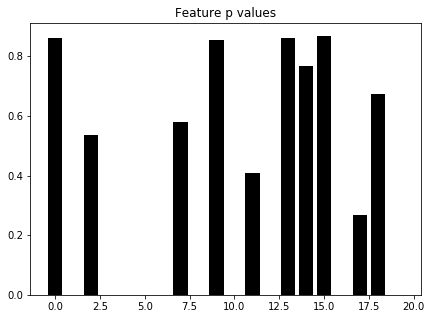

In [56]:
%matplotlib inline
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(np.arange(20), p, color='k')
ax.set_title("Feature p values")

In [57]:
import sklearn.datasets as ds
diabetes = ds.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [58]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score,ShuffleSplit

shuff = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
score_before = cross_val_score(lr,X,y,cv=shuff,scoring=make_scorer(mean_squared_error,greater_is_better=False)).mean()

score_before

-3053.3934463082664

In [59]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV()
lasso_cv.fit(X,y)
lasso_cv.coef_

array([  -0.        , -226.2375274 ,  526.85738059,  314.44026013,
       -196.92164002,    1.48742026, -151.78054083,  106.52846989,
        530.58541123,   64.50588257])

In [60]:
import numpy as np
columns = np.arange(X.shape[1])[lasso_cv.coef_ != 0]
columns

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
score_afterwards = cross_val_score(lr,X[:,columns],y,cv=shuff, scoring=make_scorer(mean_squared_error,greater_is_better=False)).mean()
score_afterwards

-3033.5012859289682

In [62]:
X, y = ds.make_regression(noise=5)

In [63]:
shuff = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

score_before = cross_val_score(lr,X,y,cv=shuff, scoring=make_scorer(mean_squared_error,greater_is_better=False)).mean()

In [64]:
lasso_cv = LassoCV()
lasso_cv.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [65]:
columns = np.arange(X.shape[1])[lasso_cv.coef_ != 0]
score_afterwards = cross_val_score(lr,X[:,columns],y,cv=shuff, scoring=make_scorer(mean_squared_error,greater_is_better=False)).mean()
print("Score before:",score_before)
print("Score after: ",score_afterwards)

Score before: -9697.13388502
Score after:  -20.8515737757
